# Scrape-And-Download

---



## Overview
本ノートブックは検索エンジンから指定された検索ワードに関連する画像をダウンロードするプログラムです。<br>

## Notes
*   このプログラムは学習・研究目的での利用を想定しています。商用利用の際は、各検索エンジンのAPI利用規約を確認し、適切に利用してください。

*   ダウンロードした画像の著作権は、画像の所有者や提供元にあります。再配布、再利用する際は、著作権を尊重してください。


## Usage
以下の2種類の使用法があります。
これらを使用して、目的に応じて必要枚数画像を収集することができます。<ber>

1.   Seleniumを使用した自作モジュールによるスクレイピング (Google検索エンジン対応)　※画像のリサイズ機能有り

2.   icrawlerによるスクレイピング



### 1. Seleniumを使用した自作モジュールによるスクレイピング (Google検索エンジン対応)
以下のオプションを設定することができます。デフォルト値はapp/scrapying.pyに記載しているので、そちらご参照ください。<br>

*   search_word: 検索ワード

*   num_images: 保存する画像枚数

*   image_width: 保存する画像の幅

*   image_height: 保存する画像の高さ

*   save_directory: 保存先のフォルダ名


実行の結果は、save_images/{save_directory}配下に保存されます。<br>
また、本プログラムではスクロール回数の制限やフィルタリング機能（検索ワードにより関連した画像を選択）を実装しているため、大量の画像を取得したい場合、指定枚数に達しない可能性があります。
その場合、検索ワードを変えたり、検索ワードのバリエーションを増やすなどして画像を収集してください。<br>

In [3]:
!python3 scraping.py --search_word="car" --num_images=100 --image_width=416 --image_height=416 --save_directory="car"

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/app/image_scraping/src/scraping.py:101: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_pil_resized = img_pil.resize(image_size, Image.LANCZOS)


In [2]:
!python3 scraping.py --search_word="bike" --num_images=100 --image_width=416 --image_height=416 --save_directory="bike"

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/app/image_scraping/src/scraping.py:101: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_pil_resized = img_pil.resize(image_size, Image.LANCZOS)


In [4]:
!python3 scraping.py --search_word="LEXUS" --num_images=100 --image_width=416 --image_height=416 --save_directory="LEXUS"

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/app/image_scraping/src/scraping.py:101: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_pil_resized = img_pil.resize(image_size, Image.LANCZOS)


### 2. icrawlerによるスクレイピング (Bing検索エンジン対応)

In [5]:
import os
from icrawler.builtin import BingImageCrawler

folder_name = "car2"  # この部分を適切なフォルダ名に変更してください
save_path = os.path.join("..", "save_images", folder_name)

bing_crawler = BingImageCrawler(
    downloader_threads=4, storage={'root_dir' : save_path}
)
bing_crawler.crawl(keyword="car", filters=None, offset=0, max_num=100)

2023-09-15 14:35:48,364 - INFO - icrawler.crawler - start crawling...
2023-09-15 14:35:48,365 - INFO - icrawler.crawler - starting 1 feeder threads...
2023-09-15 14:35:48,366 - INFO - feeder - thread feeder-001 exit
2023-09-15 14:35:48,366 - INFO - icrawler.crawler - starting 1 parser threads...
2023-09-15 14:35:48,367 - INFO - icrawler.crawler - starting 4 downloader threads...
2023-09-15 14:35:48,925 - INFO - parser - parsing result page https://www.bing.com/images/async?q=car&first=0
2023-09-15 14:35:49,630 - INFO - downloader - image #1	https://cdn.vox-cdn.com/thumbor/IZ7fpJNSeEO1v2vNapVlLYlCWzc=/214x0:1037x549/1200x800/filters:focal(214x0:1037x549)/cdn.vox-cdn.com/uploads/chorus_image/image/45200072/new-ford-gt-supercar-0006.0.0.jpg
2023-09-15 14:35:49,951 - INFO - downloader - image #2	https://picturebdgallery.files.wordpress.com/2012/02/car-01-8.jpg
2023-09-15 14:35:50,638 - INFO - downloader - image #3	https://www.hdwallpapers.in/download/tesla_roadster_sports_car-wide.jpg
2023

## Visualization
以下のような画像を保存することができました。

2023-09-15 14:37:03,421 - INFO - matplotlib.font_manager - generated new fontManager


Total number of images in the directory: 100


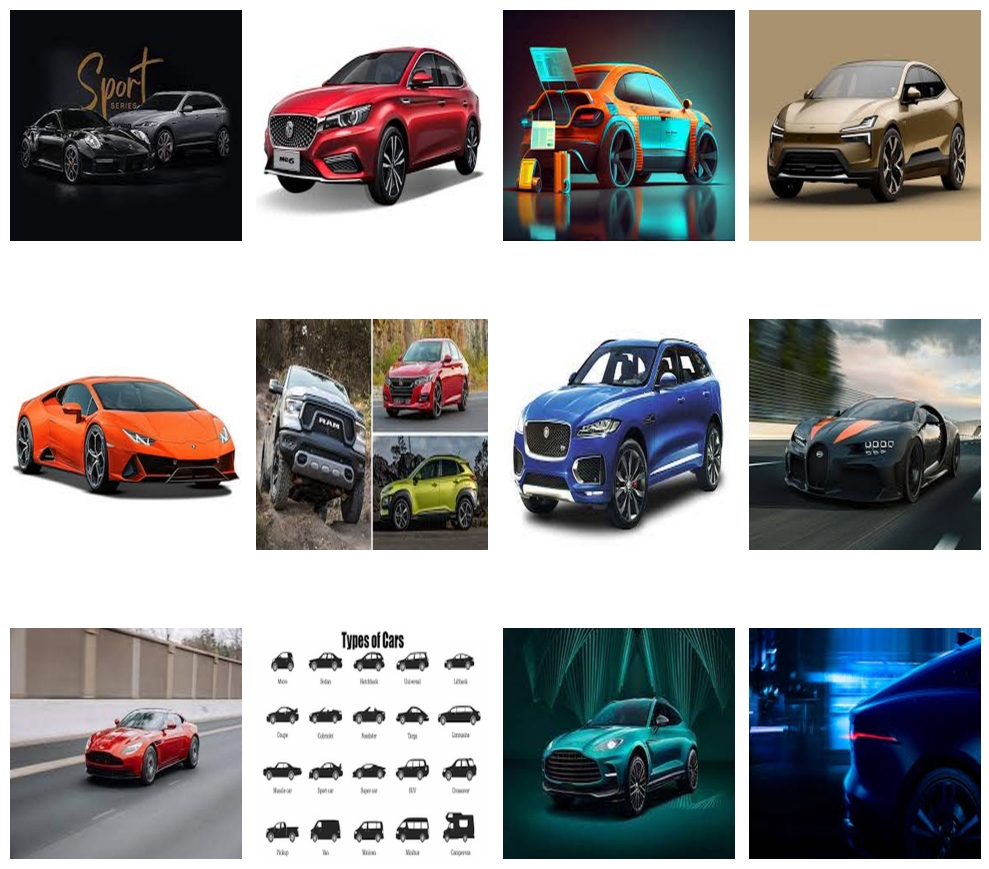

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# パラメータ設定
folder_path = "../save_images/car"
grid_size = (3, 4)
image_size = (10, 10)

# フォルダ内の画像のリストを取得
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg'))]

# トータルの画像枚数を出力
total_image_count = len(image_files)
print(f"Total number of images in the directory: {total_image_count}")

image_files = image_files[:grid_size[0] * grid_size[1]]

fig, axes = plt.subplots(*grid_size, figsize=image_size)

for ax, img_path in zip(axes.ravel(), image_files):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()